> # Essential Math for AI 
> # Chapter 4: Optimization For Neural Networks
___

# Various Activation Functions for Neural Networks

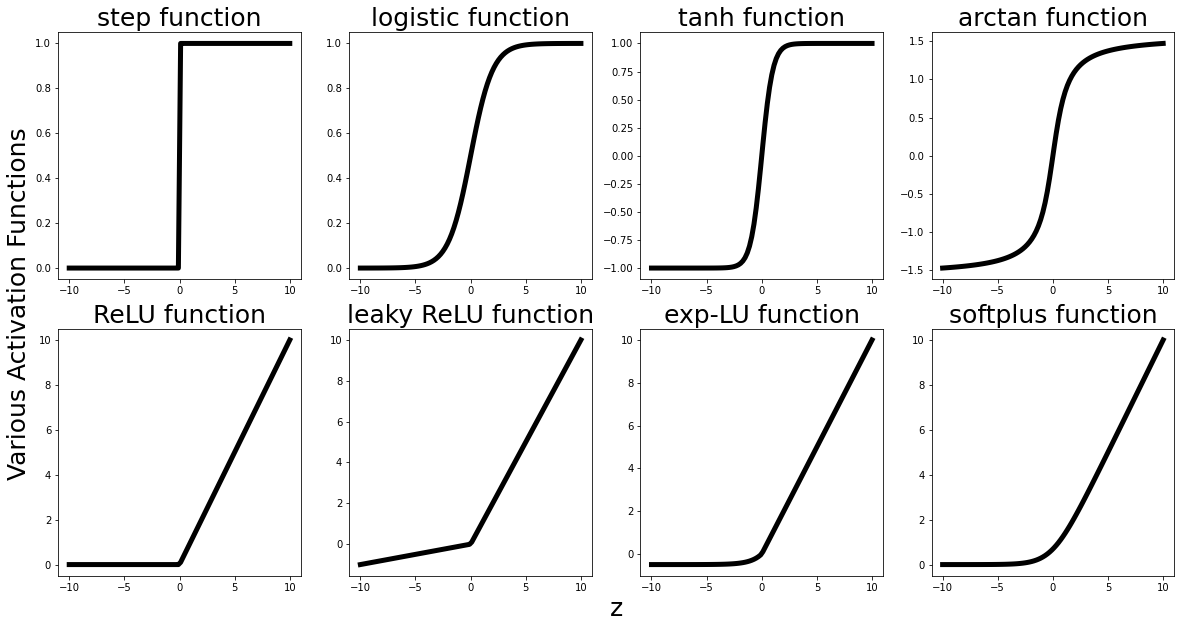

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the various activation functions
def step(s):
    if s<0:
        return 0
    else: 
        return 1
def logistic(s):
    return 1/(1+np.exp(-s))

def ReLu(s):
    if s<0:
        return 0
    else:
        return s
def param_ReLu(s):
    a=0.1
    if s<0:
        return a*s
    else:
        return s
def Exp_linear_unit(s):
    a=0.5
    if s<0:
        return a*(np.exp(s)-1)
    else:
        return s
def soft_plus(s):
    return np.log(1+np.exp(s))


s=np.linspace(-10,10,100)

fig,subs=plt.subplots(nrows=2,ncols=4,figsize=(20,10))

# this is so that the big figure object has x and y axes that we can label
fig.add_subplot(111,frameon=False)
plt.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
plt.xlabel('z',fontsize=25)
plt.ylabel('Various Activation Functions',fontsize=25)

# fill up the subplots
subs[0,0].plot(s,list(map(step,s)),'k',linewidth=5)
subs[0,0].set_title('step function',fontsize=25)
subs[0,1].plot(s,logistic(s),'k',linewidth=5)
subs[0,1].set_title('logistic function',fontsize=25)
subs[0,2].plot(s,np.tanh(s),'k',linewidth=5)
subs[0,2].set_title('tanh function',fontsize=25)
subs[0,3].plot(s,np.arctan(s),'k',linewidth=5)
subs[0,3].set_title('arctan function',fontsize=25)
subs[1,0].plot(s,list(map(ReLu,s)),'k',linewidth=5)
subs[1,0].set_title('ReLU function',fontsize=25)
subs[1,1].plot(s,list(map(param_ReLu,s)),'k',linewidth=5)
subs[1,1].set_title('leaky ReLU function',fontsize=25)
subs[1,2].plot(s,list(map(Exp_linear_unit,s)),'k',linewidth=5)
subs[1,2].set_title('exp-LU function',fontsize=25)
subs[1,3].plot(s,soft_plus(s),'k',linewidth=5)
subs[1,3].set_title('softplus function',fontsize=25)

plt.savefig('Fig_activation_functions.png')

# Approximating a continuous function by a sequence of polynomials

We will approximate $f(x)=\sin(x)$ by the sequance of polynomials $\{x, x-\frac{x^3}{3!},x-\frac{x^3}{3!}+\frac{x^5}{5!},\dots\}$ over the interval [-6.5,6.5].

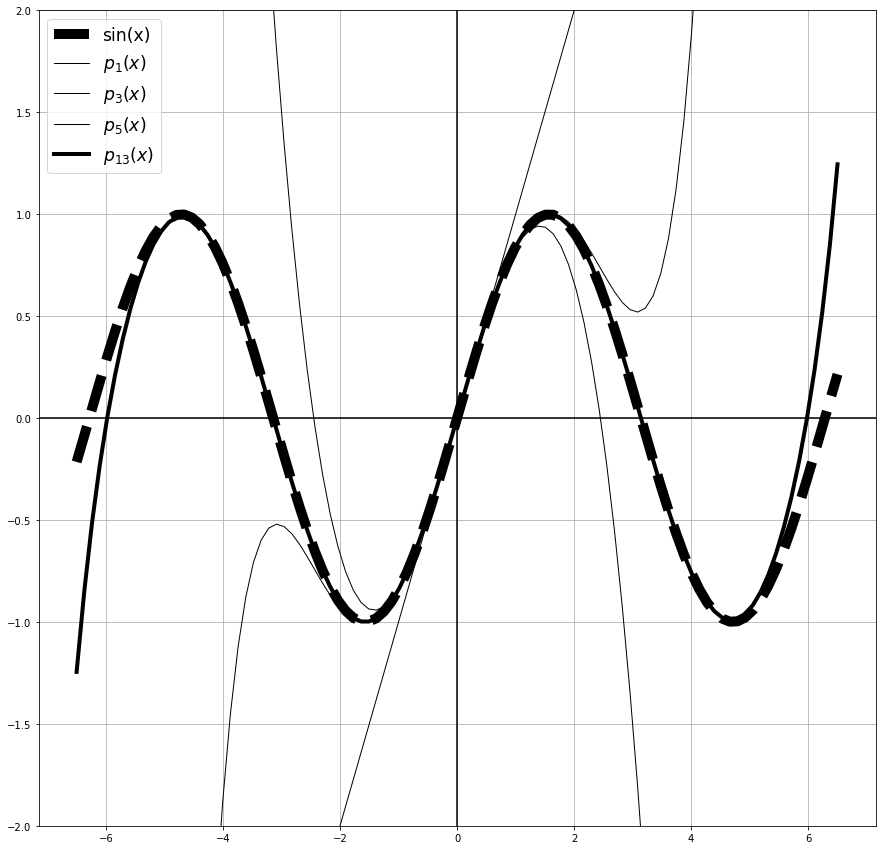

In [60]:
x=np.linspace(-6.5,6.5,100)
fig=plt.figure(figsize=(15,15))
plt.grid()
plt.ylim(-2,2)
plt.axhline(y=0, color='k') # shows the x-axis
plt.axvline(x=0, color='k') # shows the y-axis
plt.plot(x,np.sin(x),'k--',linewidth=10,label='sin(x)')
plt.plot(x,x,'k',linewidth=1,label='$p_1(x)$')
plt.plot(x,x-x**3/(np.math.factorial(3)),'k',linewidth=1,label='$p_3(x)$')
plt.plot(x,x-x**3/np.math.factorial(3)+x**5/np.math.factorial(5),'k',linewidth=1,label='$p_5(x)$')
plt.plot(x,x-x**3/np.math.factorial(3)+x**5/np.math.factorial(5)-x**7/np.math.factorial(7)+x**9/np.math.factorial(9)-x**11/np.math.factorial(11)+x**13/np.math.factorial(13),'k',linewidth=4,label='$p_{13}(x)$')
plt.legend(fontsize='xx-large')
plt.savefig('Fig_polyn_approx.png')

# Contours (or level sets) and a three dimensional plot of a non-convex function

We will plot the non-convex function $$E(\omega_1,\omega_2)=(1-\omega_1^2+\omega_2^3) e^{-(\omega_1^2+\omega_2^2)/2}$$

Such functions have local minima, making the task of searching for a global minimum harder, since an optmizing method can get stuck in a local minimum and never arrive at a global minimum. In practice, sometimes people settle for a local minimum, and never know where the global minimum is or how to find it. 

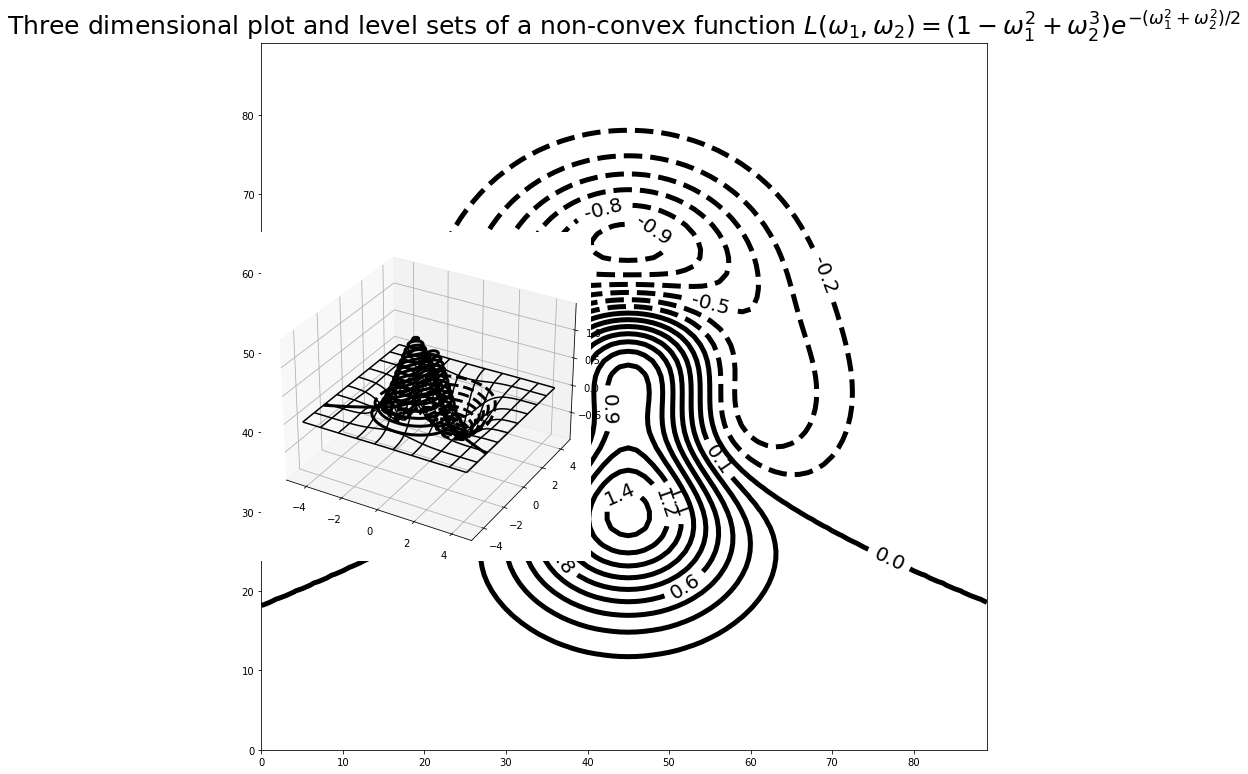

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import contour,clabel,title

# Nonconvex function 
def f(x,y):
 return (1-(x**2+y**3))*np.exp(-(x**2+y**2)/2)
 
x = np.arange(-4.5,4.5,0.1) # x-range
y = np.arange(-4.5,4.5,0.1) # y- range
X,Y = np.meshgrid(x, y) # grid of point
Z = f(X, Y) # evaluation of the function on the grid

# figure object
fig=plt.figure(figsize = (13,13))

# Nonconvex function: Contour plot
# Adding the contour lines with labels
cset=plt.contour(Z,levels=15,linewidths=5,colors='black')
clabel(cset,inline=True,fmt='%1.1f',fontsize=20)
title('Three dimensional plot and level sets of a non-convex function $L(\omega_1,\omega_2)=(1-\omega_1^2+\omega_2^3) e^{-(\omega_1^2+\omega_2^2)/2}$', fontsize=25)

# set up the second plot (the smaller one)
sub = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D wireframe and contours in the second plot
sub.plot_wireframe(X, Y, Z, rstride=10, cstride=10,colors='black')
sub.contour3D(X,Y,Z,25,cmap=None,colors='black',linewidths=3) 

plt.savefig('Fig_contours_nonconvex1.png')

## Plot 3D surface and its level sets side by side

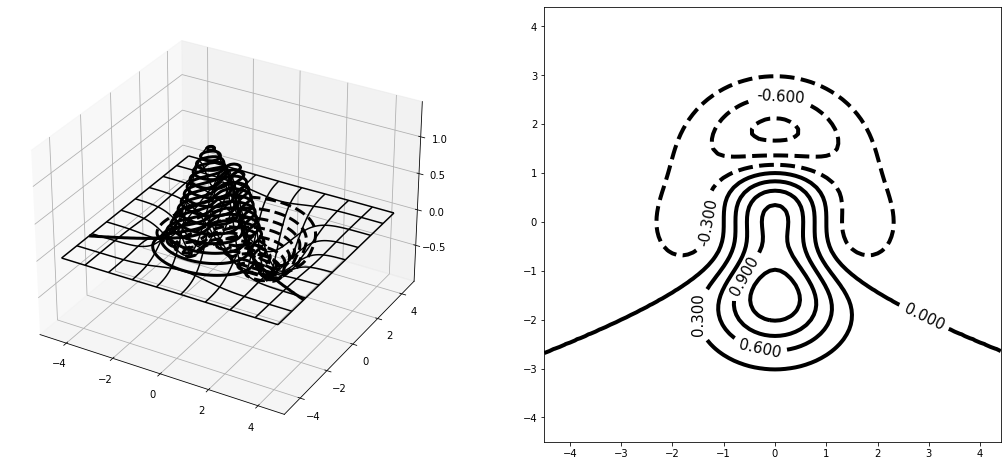

In [86]:
# Nonconvex function 
def f(x,y):
 return (1-(x**2+y**3))*np.exp(-(x**2+y**2)/2)
 
x = np.arange(-4.5,4.5,0.1) # x-range
y = np.arange(-4.5,4.5,0.1) # y- range
X,Y = np.meshgrid(x, y) # grid of point
Z =f(X, Y) # evaluation of the function on the grid

plt.figure(figsize=(18,8))

sub1=plt.subplot(1,2,1,projection='3d')
sub1.plot_wireframe(X, Y, Z, rstride=10, cstride=10,colors='black')
sub1.contour3D(X,Y,Z,25,cmap=None,colors='black',linewidths=3)

plt.subplot(1,2,2)
contour_set=contour(X,Y,Z,linewidths=4,colors='black')
plt.clabel(contour_set,inline=True,fontsize=15,colors='black')

plt.savefig('Fig_contours_nonconvex2.png')

## Plot 3D surface with 2D contours projection (level sets) on the $\mathbb{R}^2$ plane

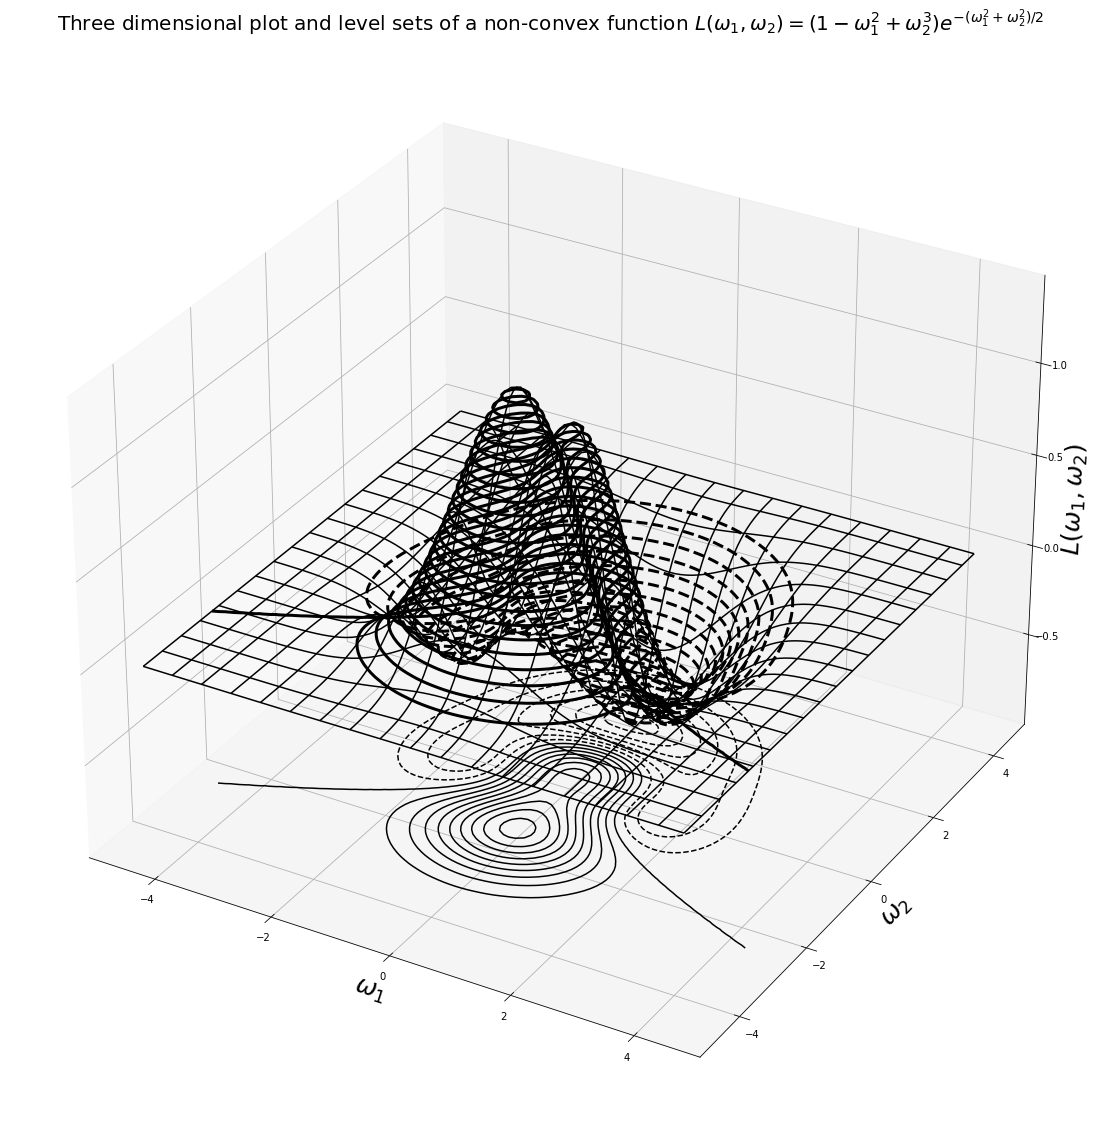

In [63]:
# Nonconvex function 
def f(x,y):
 return (1-(x**2+y**3))*np.exp(-(x**2+y**2)/2)
 
x = np.arange(-4.5,4.5,0.1) # x-range
y = np.arange(-4.5,4.5,0.1) # y- range
X,Y = np.meshgrid(x, y) # grid of point
Z = f(X, Y) # evaluation of the function on the grid

fig = plt.figure(figsize=(20,20))
sub = fig.add_subplot(111, projection='3d')

sub.contour3D(X,Y,Z,40,cmap=None,colors='black',linewidths=3)
sub.plot_wireframe(X, Y, Z, rstride=5, cstride=5,colors='black')
cset = sub.contour(X, Y, Z, zdir='z',levels=15, offset=np.min(Z), colors='black')

sub.set_xlabel('$\omega_1$',fontsize=25)
sub.set_ylabel('$\omega_2$',fontsize=25)
sub.set_zlabel('$L(\omega_1,\omega_2$)',fontsize=25)

title('Three dimensional plot and level sets of a non-convex function $L(\omega_1,\omega_2)=(1-\omega_1^2+\omega_2^3) e^{-(\omega_1^2+\omega_2^2)/2}$', fontsize=20)

plt.savefig('Fig_contours_nonconvex3.png')

## Another non-convex function with its level sets

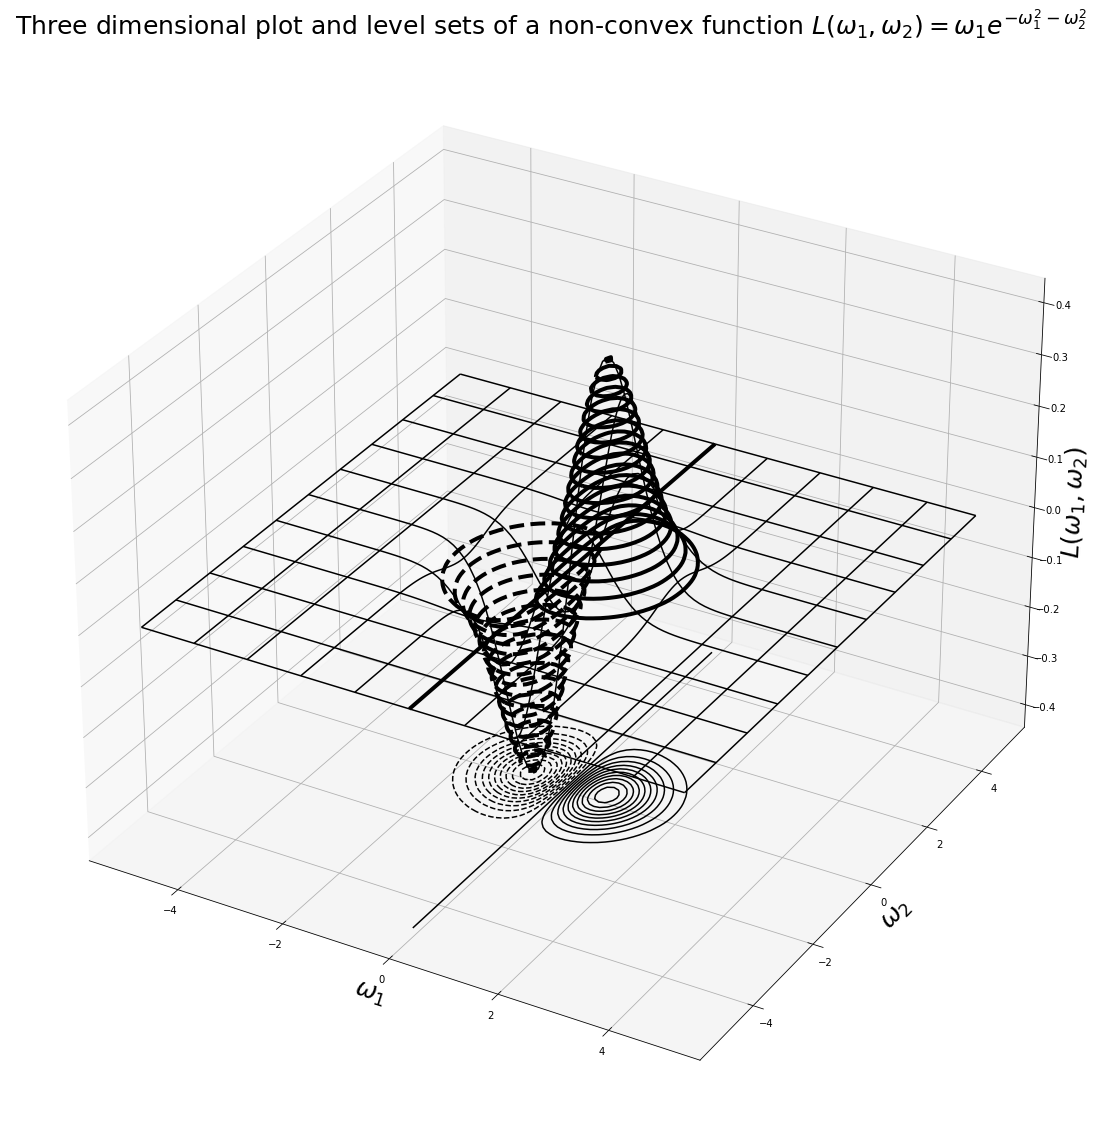

In [24]:
# Non-convex function
def f(x,y):
    return x*np.exp(-x**2 - y**2)


x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)


fig = plt.figure(figsize=(20,20))
sub = fig.add_subplot(111, projection='3d')

sub.contour3D(X,Y,Z,40,cmap=None,colors='black',linewidths=4)
sub.plot_wireframe(X, Y, Z, rstride=10, cstride=10,colors='black')
cset = sub.contour(X, Y, Z,levels=25, zdir='z', offset=np.min(Z), colors='black')

sub.set_xlabel('$\omega_1$',fontsize=25)
sub.set_ylabel('$\omega_2$',fontsize=25)
sub.set_zlabel('$L(\omega_1,\omega_2$)',fontsize=25)

title('Three dimensional plot and level sets of a non-convex function $L(\omega_1,\omega_2)=\omega_1e^{-\omega_1^2-\omega_2^2}$', fontsize=25)

plt.savefig('Fig_contours_nonconvex4.png')

# A Couple Gradient Descent Steps

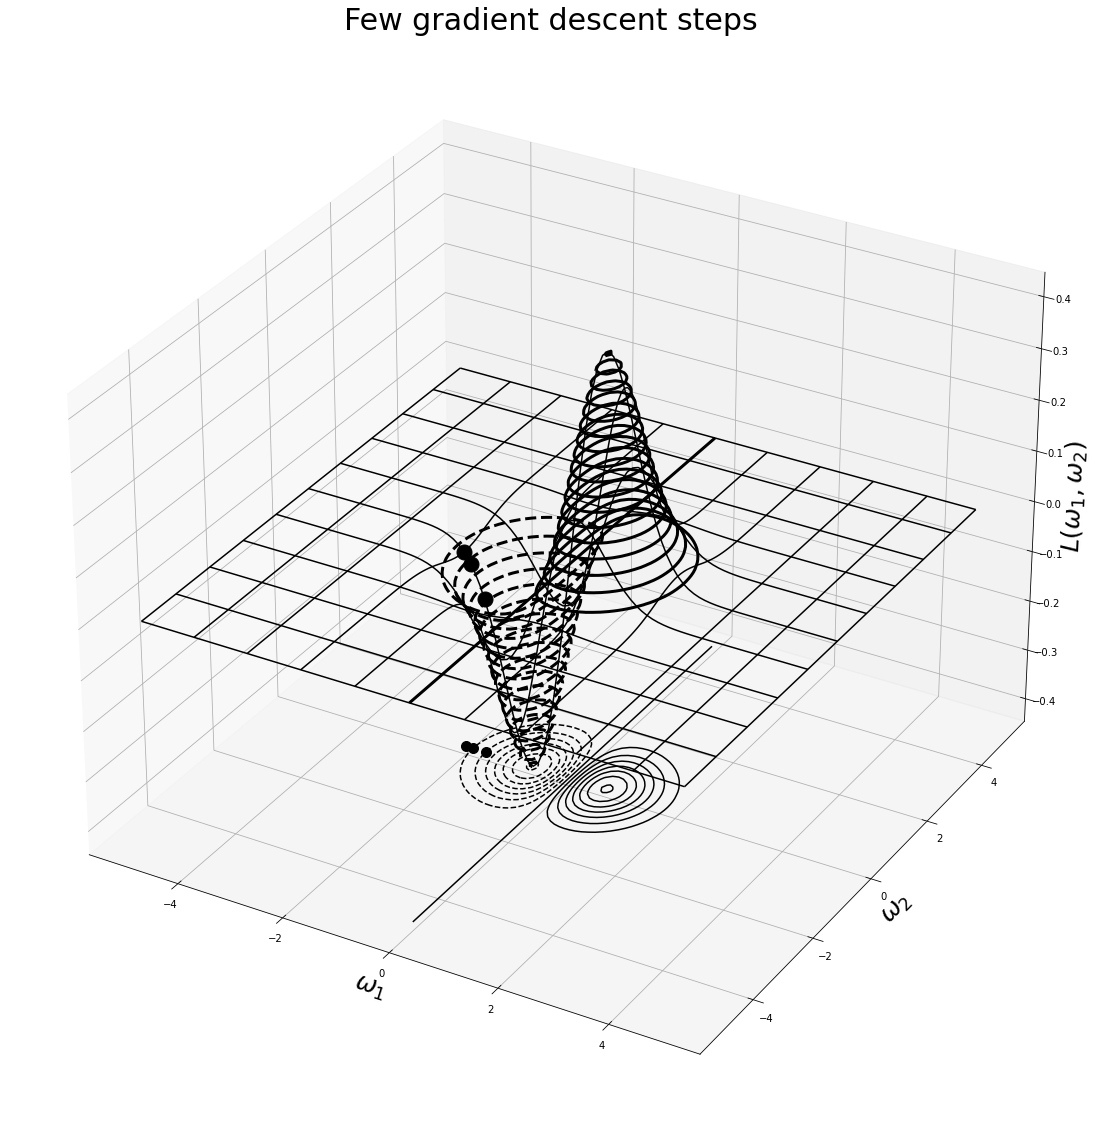

In [54]:
# Non-convex function
def f(x,y):
    return x*np.exp(-x**2 - y**2)

# gradient of f
def grad_f(x,y):
    list=[]
    list.append((1-2*x**2)*(np.exp(-x**2 - y**2)))
    list.append((-2*x*y)*(np.exp(-x**2 - y**2)))
    return list

# learning rate
eta=3

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)


fig = plt.figure(figsize=(20,20))
sub = fig.add_subplot(111, projection='3d')

sub.contour3D(X,Y,Z,40,cmap=None,colors='black',linewidths=3)
sub.plot_wireframe(X, Y, Z, rstride=10, cstride=10,colors='black')
cset = sub.contour(X, Y, Z,levels=15, zdir='z', offset=np.min(Z), colors='black')

# start at (-2,0)
sub.plot(-2,0,f(-2,0),'ko',markersize=15)
sub.plot(-2,0,np.min(Z),'ko',markersize=10)

# move one step opposite to the gradient
sub.plot(-2+7/np.exp(4),0,f(-2+7/np.exp(4),0),'ko',markersize=15)
sub.plot(-2+7/np.exp(4),0,np.min(Z),'ko',markersize=10)

# move one step opposite to the gradient with learning rate eta
sub.plot(-2-eta*grad_f(-2,0)[0],-eta*grad_f(-2,0)[1],f(-2-eta*grad_f(-2,0)[0],-eta*grad_f(-2,0)[1]),'ko',markersize=15)
sub.plot(-2-eta*grad_f(-2,0)[0],-eta*grad_f(-2,0)[1],np.min(Z),'ko',markersize=10)

sub.set_xlabel('$\omega_1$',fontsize=25)
sub.set_ylabel('$\omega_2$',fontsize=25)
sub.set_zlabel('$L(\omega_1,\omega_2$)',fontsize=25)

title('Few gradient descent steps', fontsize=30)

plt.savefig('Fig_gradient_descent_steps.png')

# Contours (level sets) and a three dimensional plot of a convex function, such as the mean squared error function

We will plot the convex function $$E(\omega_1,\omega_2)=a\omega_1^2+\omega_2^2.$$

Note that in applications, if $a$ is small or large compared to $1$, then the feature corresponding to the first weight has a very different scale than the feature corresponding to the second weight. In a error function, this results in a narrow bowl shape, making the optmization problem slow and difficult with a possible zig-zagging behavior. It is important to scale the features before feeding them to the optimization problem, and that's part of feature engineering in data science. 

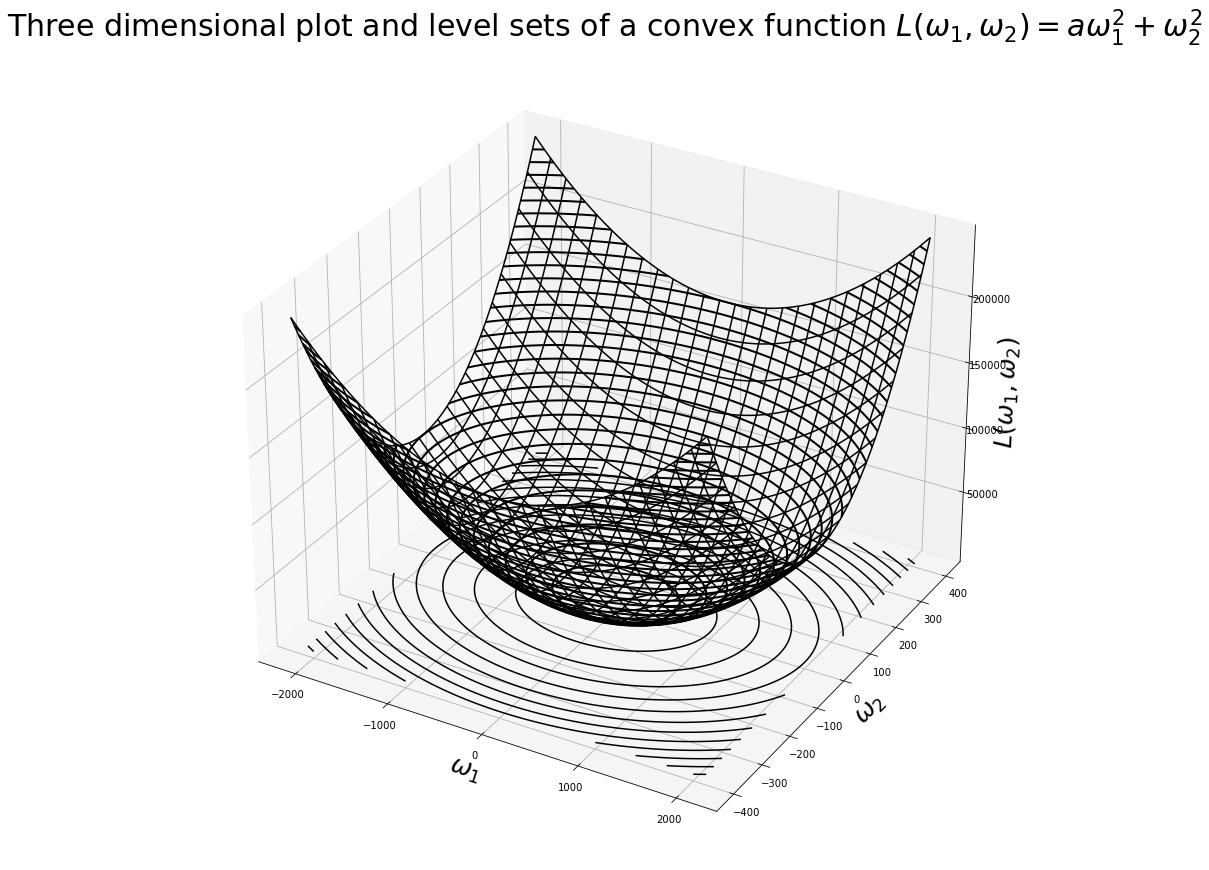

In [21]:
# Convex function
def f(x,y):
    a=0.02
    return a*x**2+y**2

x=np.linspace(-2100,2100,250)
y=np.linspace(-400,400,250)
# create the two dimensional grid
X,Y=np.meshgrid(x,y)
# Z=f(each point in the mesh grid)
Z=f(X,Y)

fig = plt.figure(figsize=(15,15))
sub = fig.add_subplot(111, projection='3d')

sub.contour3D(X,Y,Z,40,cmap=None,colors='black',linewidths=2)
sub.plot_wireframe(X, Y, Z, rstride=10, cstride=10,colors='black')
cset = sub.contour(X, Y, Z, zdir='z',levels=15, offset=np.min(Z), colors='black')

sub.set_xlabel('$\omega_1$',fontsize=25)
sub.set_ylabel('$\omega_2$',fontsize=25)
sub.set_zlabel('$L(\omega_1,\omega_2$)',fontsize=25)

title('Three dimensional plot and level sets of a convex function $L(\omega_1,\omega_2)=a\omega_1^2+\omega_2^2$', fontsize=30)

plt.savefig('Fig_contours_convex.png')

# Let's do one gradient descent step on a simple convex function with two different learning rates $\eta$

Consider the function of two variables:

$$L(\omega_1,\omega_1)=\omega_1^2+\omega_2^2$$

The level sets of this function $L(\omega_1,\omega_1)=\omega_1^2+\omega_2^2=c$ are concentric circles of center $\begin{pmatrix}0\\0\end{pmatrix}$ and radii $\sqrt{c}$. These live in the $\mathbb{R}^2$ plane.

The gradient vector $\nabla L(\omega_1,\omega_2)=\begin{pmatrix}2\omega_1\\2\omega_2\end{pmatrix}$ of this function also lives in the $\mathbb{R}^2$ plane.

So if we want to find the minimizer of this function using the gradient descent method: 

$$\omega^{i+1}=\omega^i-\eta\nabla L(\omega^i),$$

we land at a point and follow the negative of the gradient vector inorder to choose the next point. We hope that choosing the next point this way lands us at a point with lower function value, since the negative of the gradient vector points in the direction of steepest descent. We have to be careful to choose the learning rate $\eta$ in such a way that we do not overshoot. 


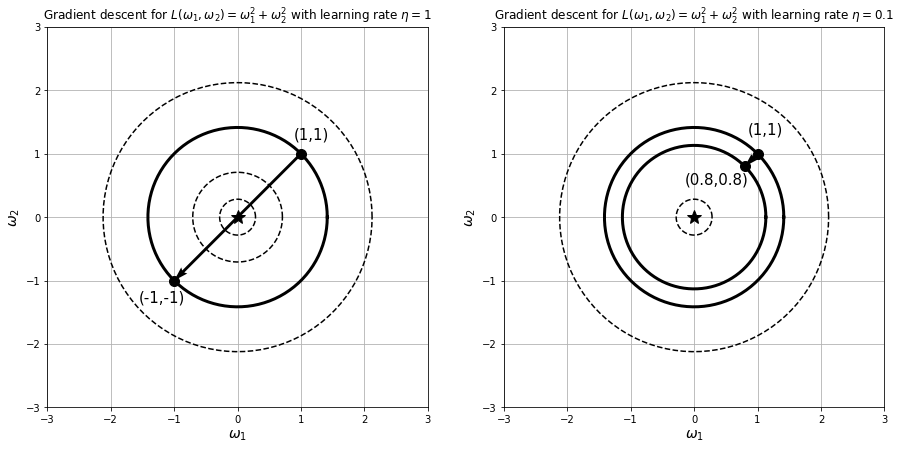

In [30]:
# set the figure and labels
fig, subs=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
subs[0].grid()
subs[0].set_xlabel('$\omega_1$',fontsize=14)
subs[0].set_ylabel('$\omega_2$',fontsize=14)
subs[0].set_xlim(-3,3)
subs[0].set_ylim(-3,3)
subs[0].set_title('Gradient descent for $L(\omega_1,\omega_2)=\omega_1^2+\omega_2^2$ with learning rate $\eta=1$', fontsize=12)

subs[1].grid()
subs[1].set_xlabel('$\omega_1$',fontsize=14)
subs[1].set_ylabel('$\omega_2$',fontsize=14)
subs[1].set_xlim(-3,3)
subs[1].set_ylim(-3,3)
subs[1].set_title('Gradient descent for $L(\omega_1,\omega_2)=\omega_1^2+\omega_2^2$ with learning rate $\eta=0.1$', fontsize=12)

# plot the level set of (1,1) in the first subplot
t=np.linspace(0,2*np.pi,100)
x=np.sqrt(2)*np.cos(t)
y=np.sqrt(2)*np.sin(t)
subs[0].plot(x,y,'k',linewidth=3)
subs[0].plot(1.5*x,1.5*y,'k--')
subs[0].plot(0.5*x,0.5*y,'k--')
subs[0].plot(0.2*x,0.2*y,'k--')

subs[0].quiver(1,1,-2,-2,scale=1,scale_units='xy',angles='xy',color=['k'])
subs[0].plot(1,1,'k.',markersize=20)
subs[0].plot(-1,-1,'k.',markersize=20)
subs[0].plot(0,0,'k*',markersize=15)
subs[0].annotate('(1,1)',
            xy=(1, 1), xycoords='data',
            xytext=(-7, 15), textcoords='offset points', fontsize=15)
subs[0].annotate('(-1,-1)',
            xy=(-1, -1), xycoords='data', xytext=(-35, -22), textcoords='offset points', fontsize=15)

subs[1].plot(x,y,'k',linewidth=3)
r=np.sqrt(2*0.64) 
subs[1].plot(r*x/np.sqrt(2),r*y/np.sqrt(2),'k',linewidth=3)
subs[1].plot(1.5*x,1.5*y,'k--')
subs[1].plot(0.2*x,0.2*y,'k--')
subs[1].quiver(1,1,-0.2,-0.2,scale=1, scale_units='xy',angles='xy', color=['k']) 
subs[1].plot(1,1,'k.',markersize=20)
subs[1].plot(0.8,0.8,'k.',markersize=20)
subs[1].plot(0,0,'k*',markersize=15)


subs[1].annotate('(1,1)',
            xy=(1, 1), xycoords='data',
            xytext=(-10, 20), textcoords='offset points', fontsize=15)
subs[1].annotate('(0.8,0.8)',
            xy=(0.8, 0.8), xycoords='data', xytext=(-60, -18), textcoords='offset points', fontsize=15)

plt.savefig('Fig_different_learning_rate.png')

# The scale of the features affects the performance of the gradient descent. This is one of the reasons to standarize the features ahead of time.

Consider the function of two variables:

$$L(\omega_1,\omega_1)=\omega_1^2+a\omega_2^2$$

where a is very small compared to 1. 

Text(0.5, 0, '$L(\\omega_1,\\omega_2$)')

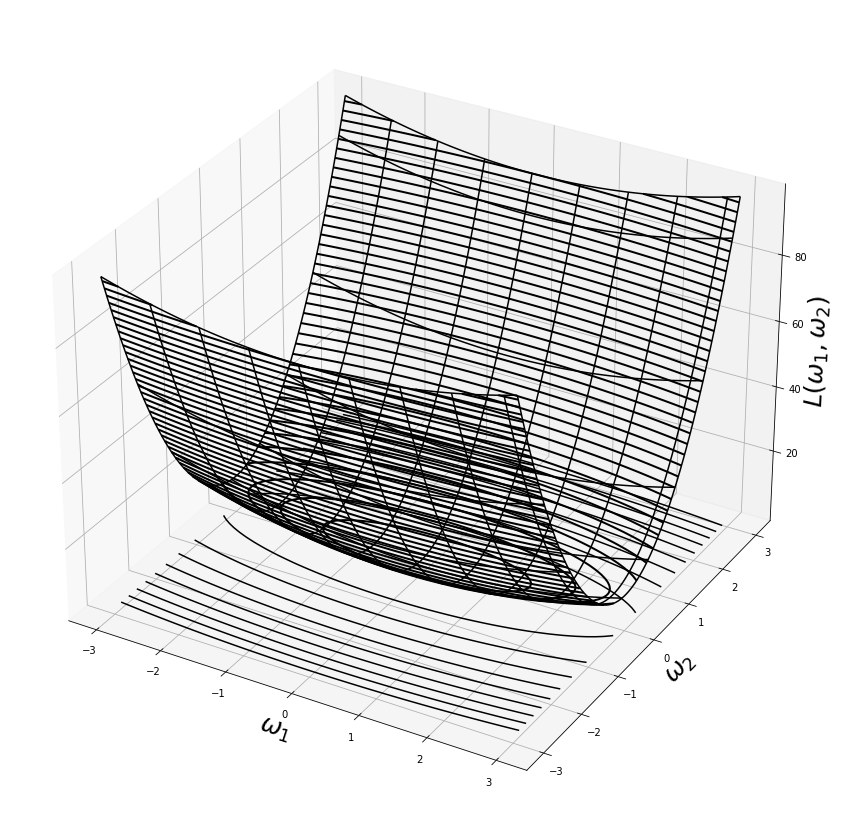

In [105]:
# Convex function, different feature scales
def f(x,y):
    a=10
    return x**2+a*y**2

x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
# create the two dimensional grid
X,Y=np.meshgrid(x,y)
# Z=f(each point in the mesh grid)
Z=f(X,Y)

# The figure
fig = plt.figure(figsize=(15,15))
sub = fig.add_subplot(111, projection='3d')

sub.contour3D(X,Y,Z,40,cmap=None,colors='black',linewidths=2)
sub.plot_wireframe(X, Y, Z, rstride=12, cstride=12,colors='black')
cset = sub.contour(X, Y, Z, zdir='z',levels=10, offset=np.min(Z), colors='black')

sub.set_xlabel('$\omega_1$',fontsize=25)
sub.set_ylabel('$\omega_2$',fontsize=25)
sub.set_zlabel('$L(\omega_1,\omega_2$)',fontsize=25)



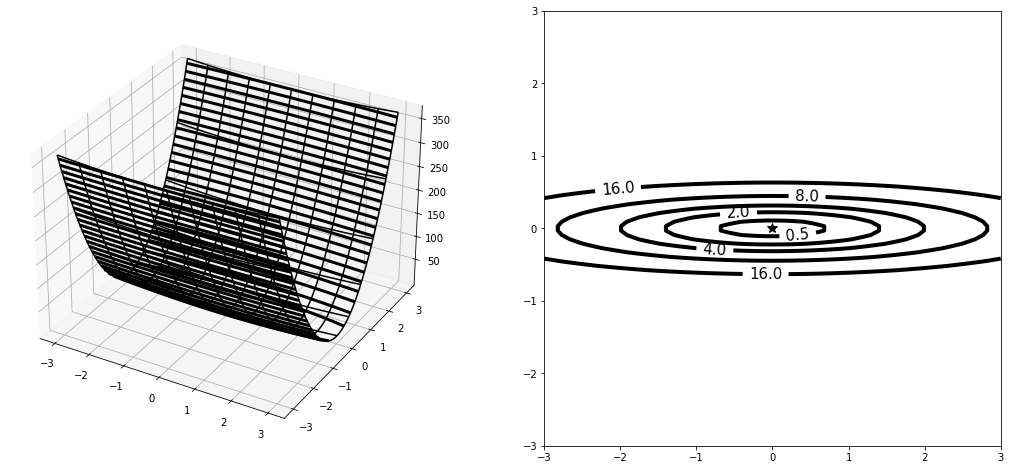

In [92]:
# Convex function, different feature scales
def f(x,y):
    a=40
    return x**2+a*y**2

x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
# create the two dimensional grid
X,Y=np.meshgrid(x,y)
# Z=f(each point in the mesh grid)
Z=f(X,Y)

plt.figure(figsize=(18,8))

sub1=plt.subplot(1,2,1,projection='3d')
sub1.plot_wireframe(X, Y, Z, rstride=10, cstride=10,colors='black')
sub1.contour3D(X,Y,Z,25,cmap=None,colors='black',linewidths=3)

plt.subplot(1,2,2)
contour_set=contour(X,Y,Z,levels=[0.5,2,4,8,16],linewidths=4,colors='black')
plt.clabel(contour_set,inline=True,fontsize=15,colors='black',fmt='%1.1f')
plt.plot(0,0,'k*',markersize=10)

plt.savefig('Fig_narrow_valley.png')

# Changing a changes the shape of the bowl of the function:

$$L(\omega_1,\omega_1)=\omega_1^2+a\omega_2^2$$

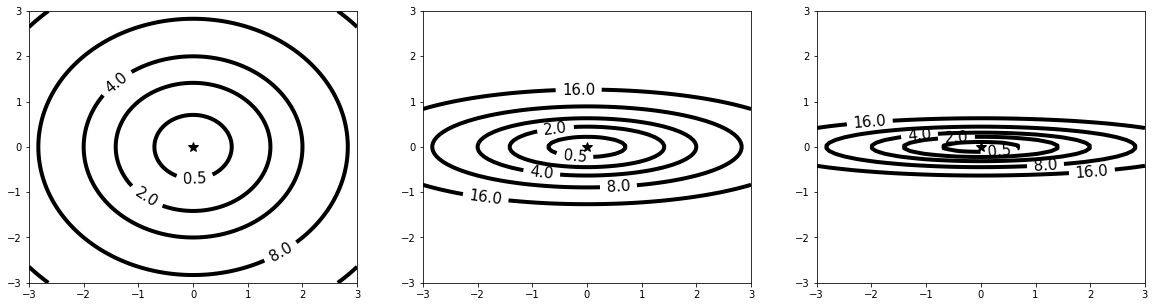

In [106]:
# Convex function, different feature scales
def f(a,x,y):
    return x**2+a*y**2

x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
# create the two dimensional grid
X,Y=np.meshgrid(x,y)
# Z=f(each point in the mesh grid)
Z=f(40,X,Y)

fig,subs=plt.subplots(nrows=1,ncols=3,figsize=(20,5))

# Z=f(each point in the mesh grid)
Z=f(1,X,Y)
plt.subplot(1,3,1)
contour_set=contour(X,Y,Z,levels=[0.5,2,4,8,16],linewidths=4,colors='black')
plt.clabel(contour_set,inline=True,fontsize=15,colors='black',fmt='%1.1f')
plt.plot(0,0,'k*',markersize=10)

# Z=f(each point in the mesh grid)
Z=f(10,X,Y)
plt.subplot(1,3,2)
contour_set=contour(X,Y,Z,levels=[0.5,2,4,8,16],linewidths=4,colors='black')
plt.clabel(contour_set,inline=True,fontsize=15,colors='black',fmt='%1.1f')
plt.plot(0,0,'k*',markersize=10)

# Z=f(each point in the mesh grid)
Z=f(40,X,Y)
plt.subplot(1,3,3)
contour_set=contour(X,Y,Z,levels=[0.5,2,4,8,16],linewidths=4,colors='black')
plt.clabel(contour_set,inline=True,fontsize=15,colors='black',fmt='%1.1f')
plt.plot(0,0,'k*',markersize=10)

plt.savefig('Fig_shapes_of_bowl.png')

# Penalizing the $l^2$ norm v.s. penalizing the $l^1$ norm

When we minimize the $l^1$, some features die before others which helps in reducing the dimension of the feature space if we happen to have a data set with a particularly large number of features. Note in the graphs below how diamond level sets lead to the early death of some features. When we minimize the $l^2$ norm, the values of the coordinates $(\omega_1,\omega_2)$ decrease but neither coordinate dies early.

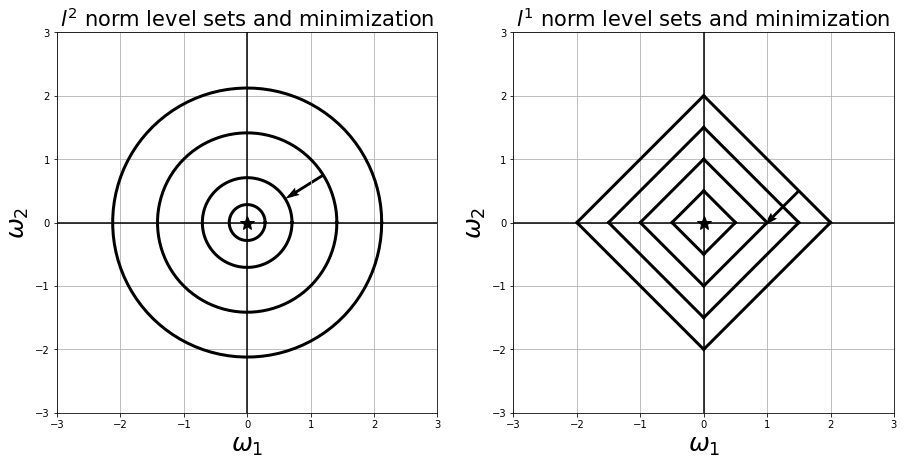

In [46]:
# set the figure and labels
fig, subs=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
subs[0].grid()
subs[0].set_xlabel('$\omega_1$',fontsize=25)
subs[0].set_ylabel('$\omega_2$',fontsize=25)
subs[0].set_xlim(-3,3)
subs[0].set_ylim(-3,3)
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the y-axis
subs[0].set_title('$l^2$ norm level sets and minimization', fontsize=21)


subs[1].grid()
subs[1].set_xlabel('$\omega_1$',fontsize=25)
subs[1].set_ylabel('$\omega_2$',fontsize=25)
subs[1].set_xlim(-3,3)
subs[1].set_ylim(-3,3)
subs[1].axhline(y=0, color='k') # shows the x-axis
subs[1].axvline(x=0, color='k') # shows the y-axis
subs[1].set_title('$l^1$ norm level sets and minimization', fontsize=21)

# plot the circular level sets w_1^2+w_2^2=c in the first subplot
t=np.linspace(0,2*np.pi,100)
x=np.sqrt(2)*np.cos(t)
y=np.sqrt(2)*np.sin(t)
subs[0].plot(x,y,'k',linewidth=3)
subs[0].plot(1.5*x,1.5*y,'k',linewidth=3)
subs[0].plot(0.5*x,0.5*y,'k',linewidth=3)
subs[0].plot(0.2*x,0.2*y,'k',linewidth=3)

# plot the minimizer
subs[0].plot(0,0,'k*',markersize=15)

# follow the path of one point during minimization (perpendicular to the level sets)
x_point=1.2
y_point=np.sqrt(2-1.2**2)
eta=0.25
dir_1=-2*eta*x_point
dir_2=-2*eta*y_point
subs[0].quiver(x_point,y_point,dir_1,dir_2,scale=1, scale_units='xy',angles='xy', color=['k'])

# plot the diamond level sets |w_1|+|w_2|=c in the second subplot
x=np.linspace(0,1,100)
y=1-x
subs[1].plot(x,y,'k',linewidth=3)
subs[1].plot(0.5*x,0.5*y,'k',linewidth=3)
subs[1].plot(1.5*x,1.5*y,'k',linewidth=3)
subs[1].plot(2*x,2*y,'k',linewidth=3)

y=-1+x
subs[1].plot(x,y,'k',linewidth=3)
subs[1].plot(0.5*x,0.5*y,'k',linewidth=3)
subs[1].plot(1.5*x,1.5*y,'k',linewidth=3)
subs[1].plot(2*x,2*y,'k',linewidth=3)

x=np.linspace(-1,0,100)
y=1+x
subs[1].plot(x,y,'k',linewidth=3)
subs[1].plot(0.5*x,0.5*y,'k',linewidth=3)
subs[1].plot(1.5*x,1.5*y,'k',linewidth=3)
subs[1].plot(2*x,2*y,'k',linewidth=3)

y=-1-x
subs[1].plot(x,y,'k',linewidth=3)
subs[1].plot(0.5*x,0.5*y,'k',linewidth=3)
subs[1].plot(1.5*x,1.5*y,'k',linewidth=3)
subs[1].plot(2*x,2*y,'k',linewidth=3)

# plot the minimizer
subs[1].plot(0,0,'k*',markersize=15)

# follow the path of one point during minimization (perpendicular to the level sets)
x_point=1.5
y_point=0.5
eta=0.55
dir_1=-eta
dir_2=-eta
subs[1].quiver(x_point,y_point,dir_1,dir_2,scale=1, scale_units='xy',angles='xy', color=['k'])


plt.savefig('Fig_l1_vs_l2.png')